<a href="https://colab.research.google.com/github/priyaank17/PROJECTS/blob/master/Project_2_COVID_INDIA_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 INDIA CASES TIME SERIES FORECASTING

### Organization of this document

<blockquote>
    <ol>
        <li>Importing the necessary libraries</li>
        <li>Import the data directly from JSON File using covid19india.org API file</li>
        <li>High level understanding of the data</li>
        <li>Converting the count data to type numeric</li>
        <li>Manipulating the date column for Analysis</li>
        <li>Converting the 'Date Column' to 'Datetime'</li>
        <li>Verify if all the datatype conversions are in place.</li>
        <li>Analysing the number of Daily Confirmed Patients' data</li>
        <li>Plotting the Daily confirmed patients using Line plot</li>
        <li>Analysing the number of Total Confirmed Patients' data</li>
        <li>Plotting the Confirmed patients using Line plot</li>
        <li>Analysing the number of Daily Recovered Patients' data</li>
        <li> Plotting the daily recovered using Line plot</li>
        <li>Analysing the number of Total Recovered Patients' data</li>
        <li>Plotting the values on Line and Bar plots</li>
        <li>Analysing the number of Daily Deceased Patients' data</li>
        <li>Plotting the Daily deceased using Line plot</li>
        <li>Analysing the number of Total Deceased Patients' data</li>
        <li>Plotting the Total Deceased using Line plot</li>
        <li>Daily Data Plots</li>
        <li>Combined Total Data Plots</li>
        <li>Pair-plot based on month</li>
    </ol>
</blockquote>

### 1. Importing the necessary libraries

In [ ]:
#Importing the data for visualization and Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
%matplotlib inline

### 2. Import the data directly from JSON File using covid19india.org API file

DATA SOURCE

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%b-%y')

In [ ]:
url_data="https://api.covid19india.org/data.json"

In [ ]:
response = requests.get(url_data)

In [ ]:
dataurl = response.json()

In [ ]:
#Storing the data in df_data
df_data = pd.DataFrame(dataurl["cases_time_series"])

### 3. High level understanding of the data

In [ ]:
df_data.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0


In [ ]:
#check the datatypes for the columns
df_data.dtypes

dailyconfirmed    object
dailydeceased     object
dailyrecovered    object
date              object
totalconfirmed    object
totaldeceased     object
totalrecovered    object
dtype: object

In [ ]:
#Checking for the null values
df_data.isna().sum()

dailyconfirmed    0
dailydeceased     0
dailyrecovered    0
date              0
totalconfirmed    0
totaldeceased     0
totalrecovered    0
dtype: int64

### 4. Converting the count data to  type numeric

In [ ]:
df_data['dailyconfirmed']=pd.to_numeric(df_data['dailyconfirmed'])
df_data['dailydeceased']=pd.to_numeric(df_data['dailydeceased'])
df_data['dailyrecovered']=pd.to_numeric(df_data['dailyrecovered'])
df_data['totalconfirmed']=pd.to_numeric(df_data['totalconfirmed'])
df_data['totaldeceased']=pd.to_numeric(df_data['totaldeceased'])
df_data['totalrecovered']=pd.to_numeric(df_data['totalrecovered'])

### 5. Manipulating the date column for Analysis

In [ ]:
#Removing the leading and trailing spaces as it is a String Object
df_data['date']=df_data['date'].str.rstrip()
df_data['date']=df_data['date'].str.lstrip()

In [ ]:
#Changing the date from 29th Feb to 28th Feb as we cant create graphs with '29th Feb' Date 
datenew=df_data['date'].str.replace('(29 February)','28 February')

In [ ]:
#Adding the year 2020 to date column for further conversion of this to date time
datenew = datenew.astype(str)+' 2020'

In [ ]:
datenew.head(40)

0      30 January 2020
1      31 January 2020
2     01 February 2020
3     02 February 2020
4     03 February 2020
5     04 February 2020
6     05 February 2020
7     06 February 2020
8     07 February 2020
9     08 February 2020
10    09 February 2020
11    10 February 2020
12    11 February 2020
13    12 February 2020
14    13 February 2020
15    14 February 2020
16    15 February 2020
17    16 February 2020
18    17 February 2020
19    18 February 2020
20    19 February 2020
21    20 February 2020
22    21 February 2020
23    22 February 2020
24    23 February 2020
25    24 February 2020
26    25 February 2020
27    26 February 2020
28    27 February 2020
29    28 February 2020
30    28 February 2020
31       01 March 2020
32       02 March 2020
33       03 March 2020
34       04 March 2020
35       05 March 2020
36       06 March 2020
37       07 March 2020
38       08 March 2020
39       09 March 2020
Name: date, dtype: object

### 6. Converting the 'Date Column' to 'Datetime'

In [ ]:
df_data['date']=pd.to_datetime(datenew,dayfirst=True,format='%d %B %Y',exact=True)

In [ ]:
df_data['date']

0     2020-01-30
1     2020-01-31
2     2020-02-01
3     2020-02-02
4     2020-02-03
         ...    
129   2020-06-07
130   2020-06-08
131   2020-06-09
132   2020-06-10
133   2020-06-11
Name: date, Length: 134, dtype: datetime64[ns]

In [ ]:
#Set the index as date column
df_data.set_index(['date'])

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
date,,,,,,
2020-01-30,1,0,0,1,0,0
2020-01-31,0,0,0,1,0,0
2020-02-01,0,0,0,1,0,0
2020-02-02,1,0,0,2,0,0
2020-02-03,1,0,0,3,0,0
...,...,...,...,...,...,...
2020-06-07,10882,261,5191,257485,7206,123848
2020-06-08,8536,271,5171,266021,7477,129019
2020-06-09,9981,272,5634,276002,7749,134653


### 7.Verify if all the datatype conversions are in place.

In [ ]:
df_data.dtypes

dailyconfirmed             int64
dailydeceased              int64
dailyrecovered             int64
date              datetime64[ns]
totalconfirmed             int64
totaldeceased              int64
totalrecovered             int64
dtype: object

In [ ]:
#Checking the null values
df_data.isna().sum()

dailyconfirmed    0
dailydeceased     0
dailyrecovered    0
date              0
totalconfirmed    0
totaldeceased     0
totalrecovered    0
dtype: int64

### 8.Analysing the number of Daily Confirmed Patients' data

In [ ]:
dailyconfirmed=df_data[['date','dailyconfirmed']]

In [ ]:
dailyconfirmed.columns=['Date','Count']

In [ ]:
dailyconfirmed.head()

,Date,Count
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1


### 9. Plotting the Daily confirmed patients using Line plot

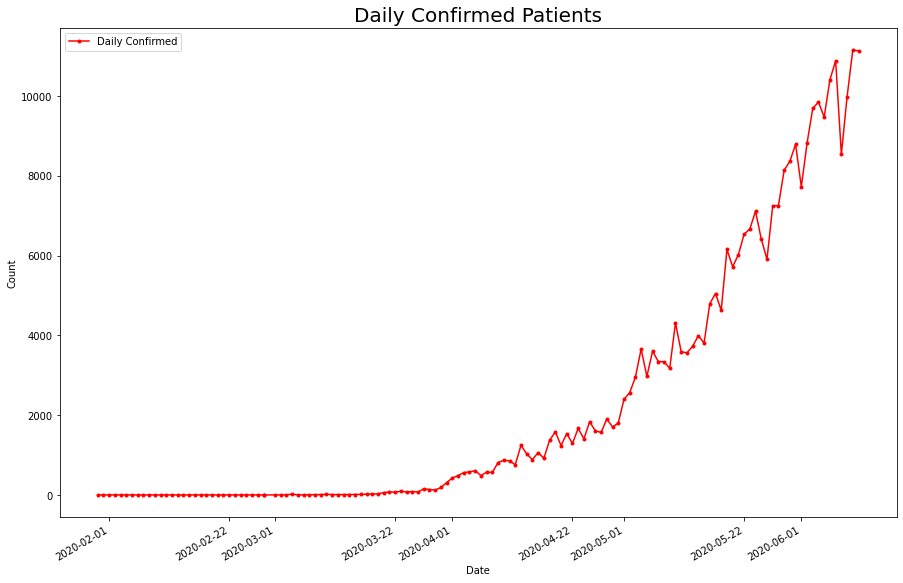

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Confirmed Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailyconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Daily Confirmed')

### 10. Analysing the number of Total Confirmed Patients' data

In [ ]:
totalconfirmed=df_data[['date','totalconfirmed']]

In [ ]:
totalconfirmed.columns=['Date','Count']

In [ ]:
totalconfirmed

,Date,Count
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3
...,...,...
129,2020-06-07,257485
130,2020-06-08,266021
131,2020-06-09,276002
132,2020-06-10,287158


### 11.Plotting the Confirmed patients using Line plot

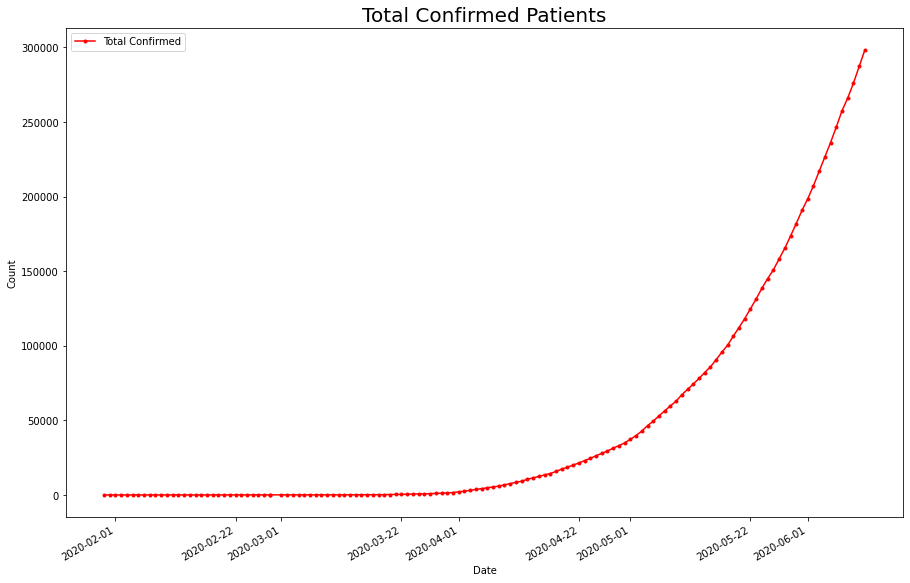

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Total Confirmed Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totalconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Total Confirmed')

### 12. Analysing the number of Daily Recovered Patients' data

In [ ]:
dailyrecovered=df_data[['date','dailyrecovered']]

In [ ]:
dailyrecovered.columns=['Date','Count']

In [ ]:
dailyrecovered

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
129,2020-06-07,5191
130,2020-06-08,5171
131,2020-06-09,5634
132,2020-06-10,6275


### 13. Plotting the daily recovered using Line plot

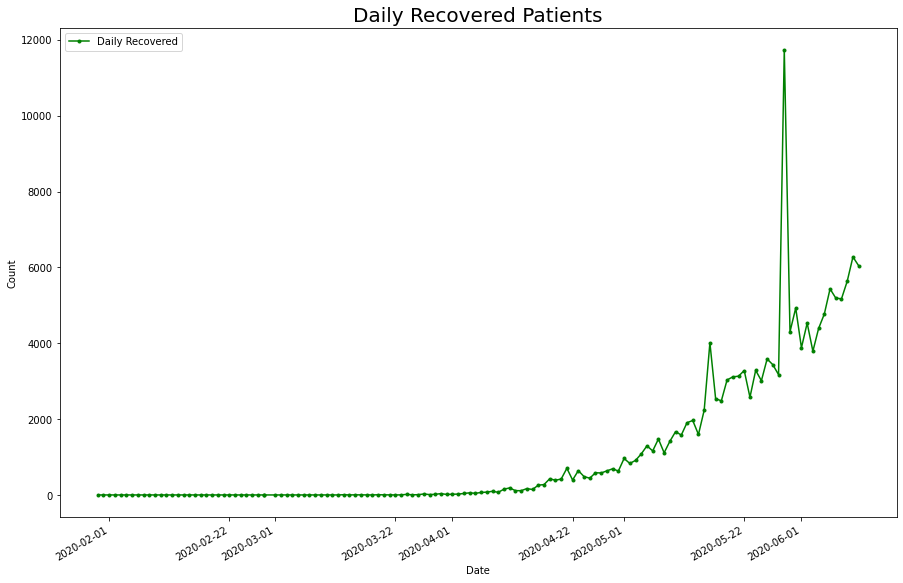

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Recovered Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailyrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Daily Recovered')

### 14. Analysing the number of Total Recovered Patients' data

In [ ]:
totalrecovered=df_data[['date','totalrecovered']]

In [ ]:
totalrecovered.columns=['Date','Count']

In [ ]:
totalrecovered

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
129,2020-06-07,123848
130,2020-06-08,129019
131,2020-06-09,134653
132,2020-06-10,140928


### 15.Plotting the values on Line and Bar plots

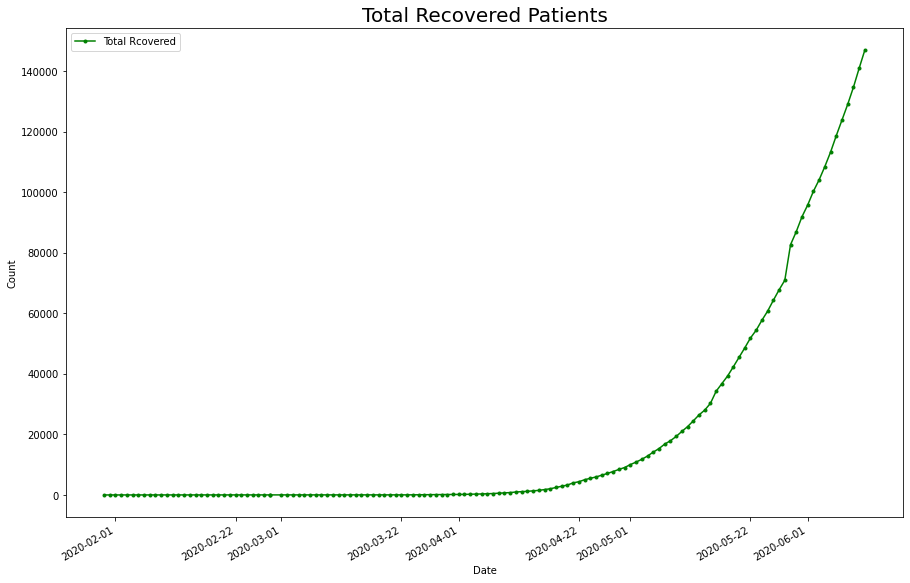

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Total Recovered Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totalrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Total Rcovered')

### 16. Analysing the number of Daily Deceased Patients' data

In [ ]:
dailydeceased=df_data[['date','dailydeceased']]

In [ ]:
dailydeceased.columns=['Date','Count']

In [ ]:
dailydeceased

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
129,2020-06-07,261
130,2020-06-08,271
131,2020-06-09,272
132,2020-06-10,358


### 17. Plotting the Daily deceased using Line plot

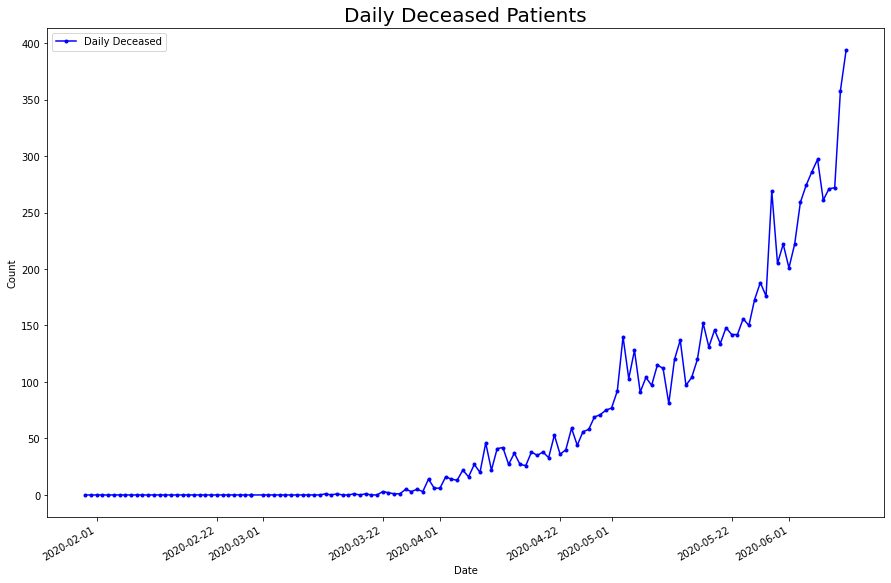

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Deceased Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailydeceased.plot(kind='line', x='Date', y='Count', color='blue',marker='.', ax=ax,label='Daily Deceased')

### 18.  Analysing the number of Total Deceased Patients' data

In [ ]:
totaldeceased=df_data[['date','totaldeceased']]

In [ ]:
totaldeceased.columns=['Date','Count']

In [ ]:
totaldeceased

,Date,Count
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0
...,...,...
129,2020-06-07,7206
130,2020-06-08,7477
131,2020-06-09,7749
132,2020-06-10,8107


### 19. Plotting the Total Deceased using Line plot

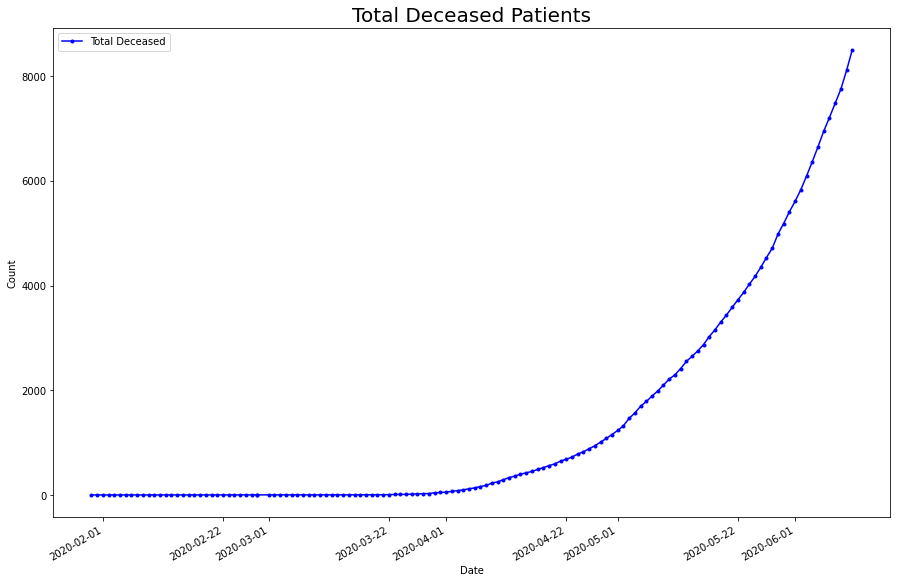

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Total Deceased Patients',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totaldeceased.plot(kind='line', x='Date', y='Count', color='blue'
                   ,marker='.', ax=ax,label='Total Deceased')

### 20.  Daily Data Plots

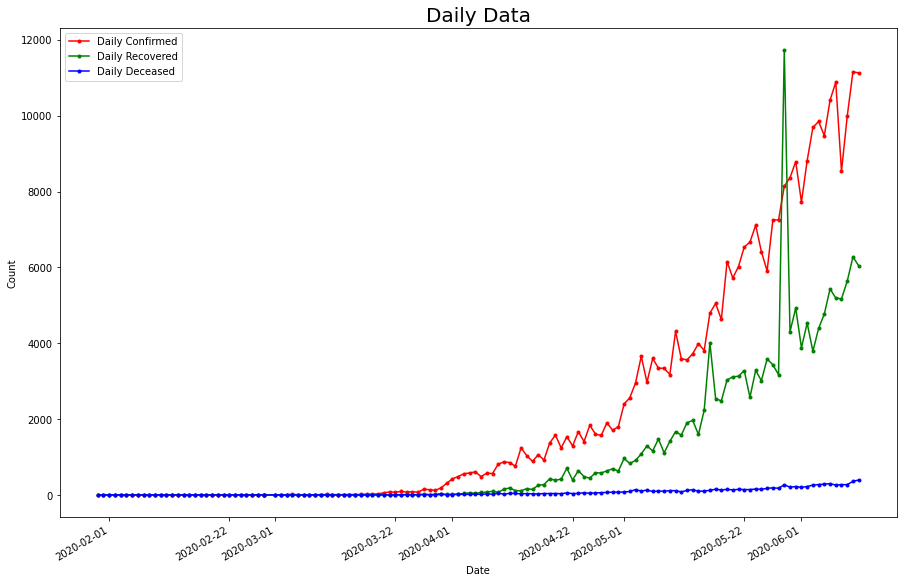

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('Daily Data',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
dailyconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Daily Confirmed')
dailyrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Daily Recovered')
dailydeceased.plot(kind='line', x='Date', y='Count', color='blue',marker='.', ax=ax,label='Daily Deceased')

### 21. Combined Total Data Plots

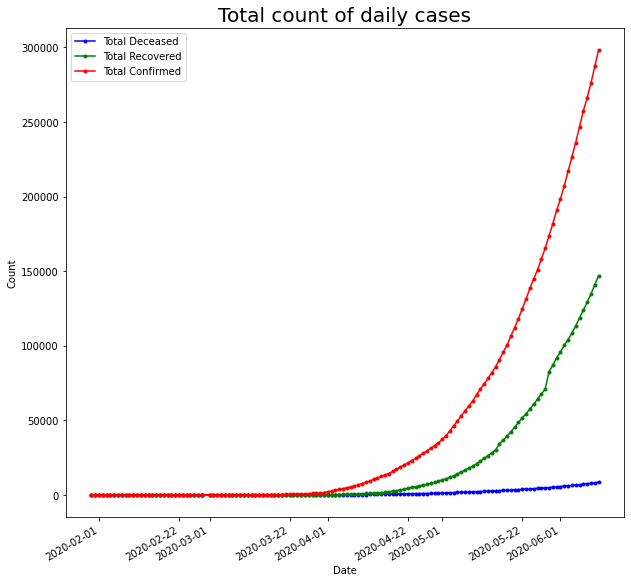

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Total count of daily cases',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Count')
totaldeceased.plot(kind='line', x='Date', y='Count', color='blue',marker='.', ax=ax,label='Total Deceased')
totalrecovered.plot(kind='line', x='Date', y='Count', color='green',marker='.', ax=ax,label='Total Recovered')
totalconfirmed.plot(kind='line', x='Date', y='Count', color='red',marker='.', ax=ax,label='Total Confirmed')

### Time series Models

In [ ]:
dailyconfirmed1=dailyconfirmed['Count']
dailyconfirmed1.dtypes
dailyconfirmed1.head()

0    1
1    0
2    0
3    1
4    1
Name: Count, dtype: int64

In [ ]:
dailyconfirmed=dailyconfirmed.set_index(['Date'])

In [ ]:
dailyconfirmed.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11'],
              dtype='datetime64[ns]', name='Date', length=134, freq=None)

In [ ]:
totalconfirmed1=totalconfirmed['Count']
totalconfirmed1.dtypes

dtype('int64')

In [ ]:
train1=dailyconfirmed[0:103] 
test1=dailyconfirmed[103:]

In [ ]:
train1=dailyconfirmed[0:103] 
test1=dailyconfirmed[103:]

In [ ]:
train=dailyconfirmed1[0:103] 
test=dailyconfirmed1[103:]

In [ ]:
test.shape

(31,)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


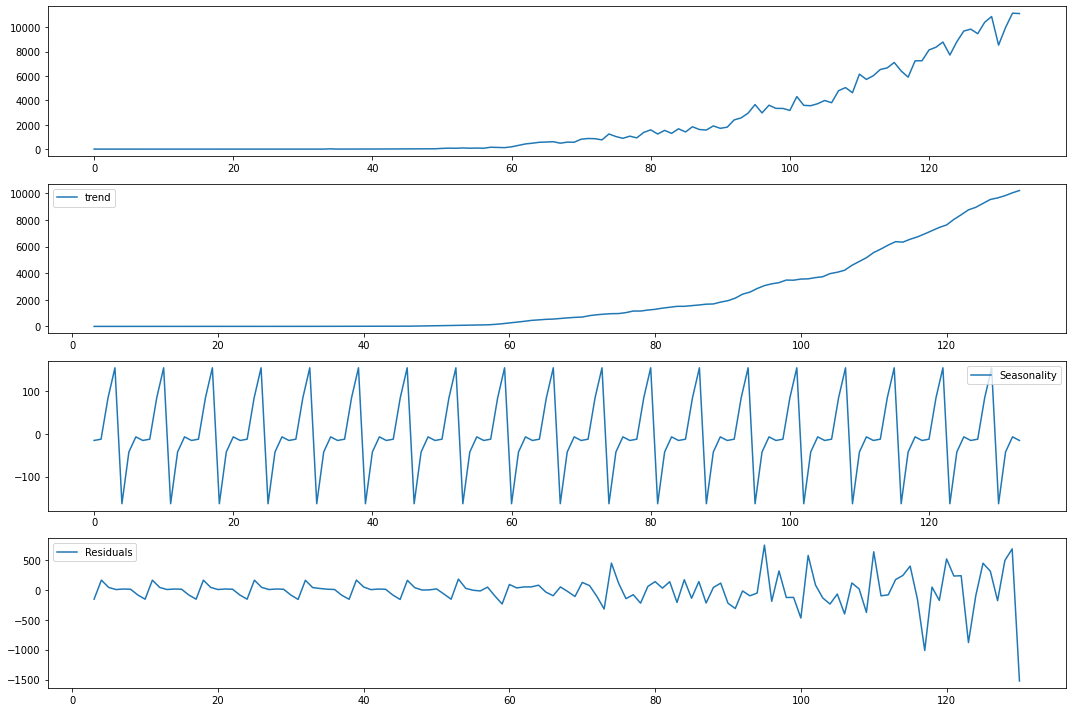

In [ ]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(dailyconfirmed1,model='additive',freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
dailyconfirmed1.plot(kind="line",figsize=(15,10),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(15,10),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(15,10),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(15,10),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

We can see that data has upward trend as shown in the above chart too.Looking at the residuala plot,we can see that even the errors are distributed with constant mean but still it contains some signal which is yet to be extracted out.
Further code tests stationarity using Augmented Dick fuller test:

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
   
    rolmean= pd.core.window.Rolling(timeseries, window=7).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=7).std()
    
    

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

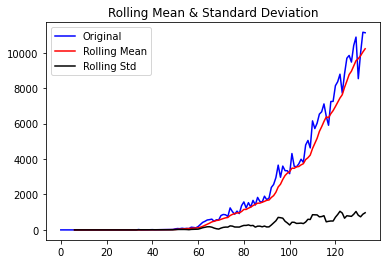

Results of Dickey-Fuller Test:
Test Statistic                   4.333792
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


In [ ]:
test_stationarity(dailyconfirmed1)

Here,to remove the stationarity we are taking a differencing of order 1 and then checking for all the stationarity tests:

In [ ]:
diff1=dailyconfirmed1.diff().dropna()

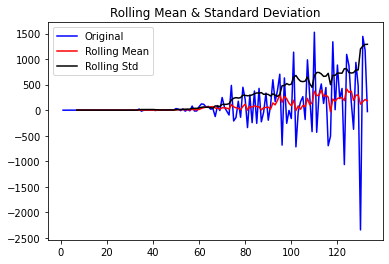

Results of Dickey-Fuller Test:
Test Statistic                  -0.918547
p-value                          0.781803
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [ ]:
test_stationarity(diff1)

Now,lets define the parameters of our time series models.The best thing to check that is to look at ACF and PACF plots.

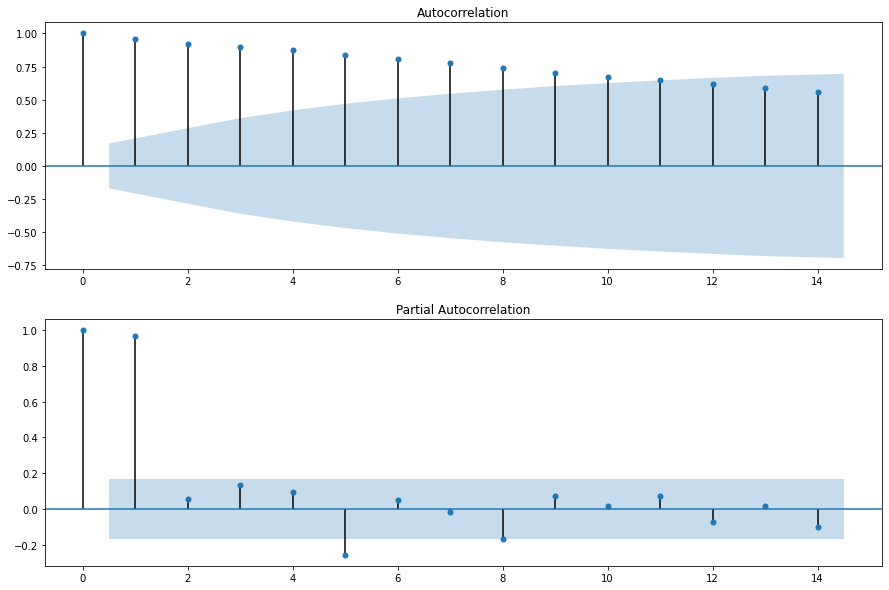

In [ ]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(dailyconfirmed1, ax=pyplot.gca(),lags=14)
pyplot.subplot(212)
plot_pacf(dailyconfirmed1, ax=pyplot.gca(),lags=14)
pyplot.show()

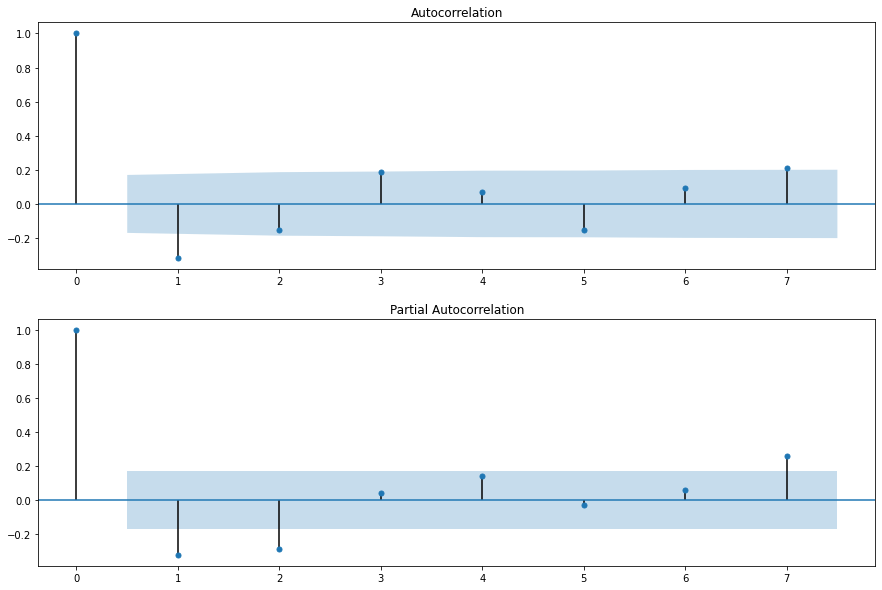

In [ ]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=7)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=7)
pyplot.show()

From the plots for the AR part of our model,we can see that from PACF plot that best choice would be 1 or 2 and for MA part from the ACF plot best choice would be between 1 and 3.
Now,we have taken help of auto arima model of pyramid arima  and let the model deciede which are the best parameters for training our model.We have given a range of values from 1 to 3  for both p and q and differencing of 1 is taken into account.

In [ ]:
#! pip install --user pmdarima

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,7) [intercept=True]; AIC=1289.953, BIC=1302.723, Time=0.783 seconds
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=True]; AIC=1362.127, BIC=1367.235, Time=0.021 seconds
Fit ARIMA(1,1,0)x(1,1,0,7) [intercept=True]; AIC=1303.506, BIC=1313.722, Time=0.401 seconds
Fit ARIMA(0,1,1)x(0,1,1,7) [intercept=True]; AIC=1295.301, BIC=1305.517, Time=0.645 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,7) [intercept=False]; AIC=1360.128, BIC=1362.682, Time=0.020 seconds
Fit ARIMA(1,1,1)x(0,1,0,7) [intercept=True]; AIC=1335.974, BIC=1346.190, Time=0.175 seconds
Fit ARIMA(1,1,1)x(1,1,1,7) [intercept=True]; AIC=1288.691, BIC=1304.014, Time=1.081 seconds
Fit ARIMA(1,1,1)x(1,1,0,7) [intercept=True]; AIC=1302.077, BIC=1314.846, Time=0.562 seconds
Fit ARIMA(1,1,1)x(2,1,1,7) [intercept=True]; AIC=1284.387, BIC

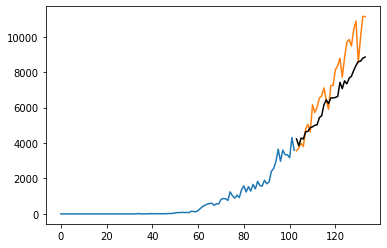

In [ ]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

Checking assumptions of residuals:

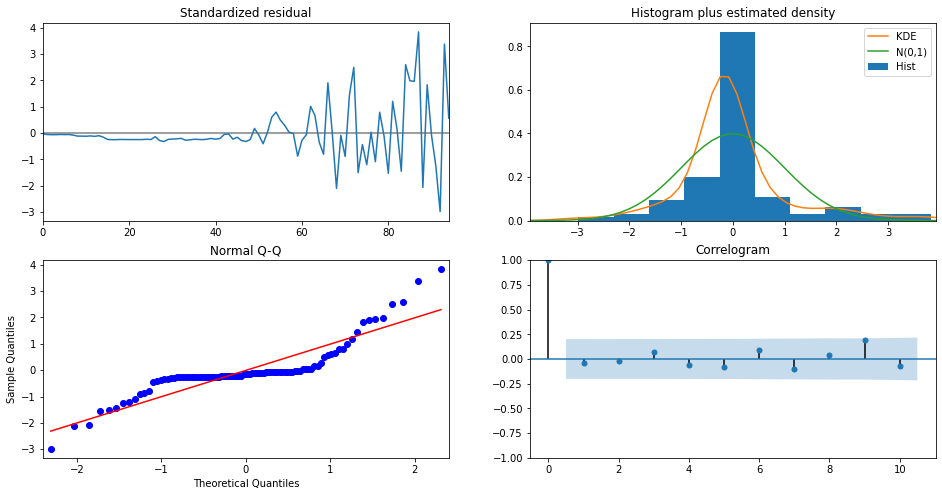

In [ ]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  103
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 7)   Log Likelihood                -635.686
Date:                           Fri, 12 Jun 2020   AIC                           1281.372
Time:                                   06:23:44   BIC                           1294.142
Sample:                                        0   HQIC                          1286.532
                                           - 103                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     46.5476     22.410      2.077      0.038       2.626      90.470
ar.L1         -0.6439      0.055    -11.717

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print(np.sqrt(mean_squared_error(y_true=test,y_pred=forecast)))
print(mean_absolute_percentage_error(test,forecast))

1336.4643777802942
34.074301665880824


Rolling Forecast Origin validation

In [ ]:
from datetime import timedelta
rolling_predictions = test1.copy()
for train_end in test1.index:
    train_data = dailyconfirmed[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=(1,1,0), seasonal_order=(2,1,0,7))
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

In [ ]:
rolling_residuals = test - rolling_predictions

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3332: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

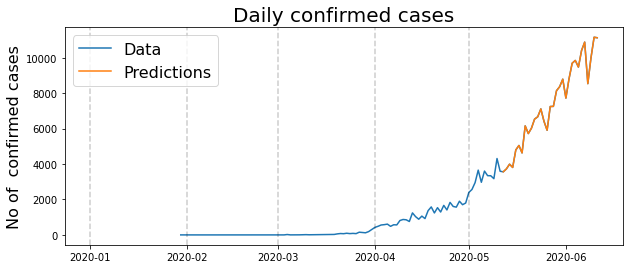

In [ ]:
from datetime import datetime
start_date=datetime(2020,1,30)
end_date=datetime(2020,6,10)
plt.figure(figsize=(10,4))

plt.plot(dailyconfirmed)
plt.plot(rolling_predictions)


plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Daily confirmed cases', fontsize=20)
plt.ylabel('No of  confirmed cases', fontsize=16)
for month in range(start_date.month,end_date.month):
    plt.axvline(pd.to_datetime('2020-'+str(month)+'-01'), color='k', linestyle='--', alpha=0.2)

MODEL 3-ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train, order=(1,1,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                  102
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -682.758
Method:                       css-mle   S.D. of innovations            195.015
Date:                Fri, 12 Jun 2020   AIC                           1371.517
Time:                        06:23:59   BIC                           1379.392
Sample:                             1   HQIC                          1374.706
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            37.9434     12.581      3.016      0.003      13.285      62.602
ar.L1.D.Count    -0.5405      0.089     -6.078      0.000      -0.715      -0.366
                                    Root

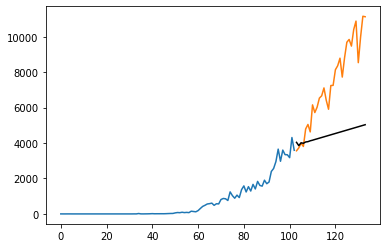

In [ ]:
forecast = model_fit.forecast(steps = 31)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Total'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print(np.sqrt(mean_squared_error(y_true=test,y_pred=forecast)))
print(mean_absolute_percentage_error(test,forecast))

3477.8291324387997
36.83515131448637


In [ ]:
diffs1=train.diff()
diffs1=diffs1.dropna()

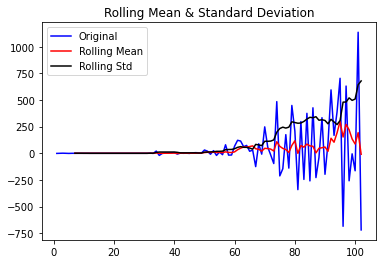

Results of Dickey-Fuller Test:
Test Statistic                  1.039236
p-value                         0.994663
#Lags Used                     12.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [ ]:
test_stationarity(diffs1)

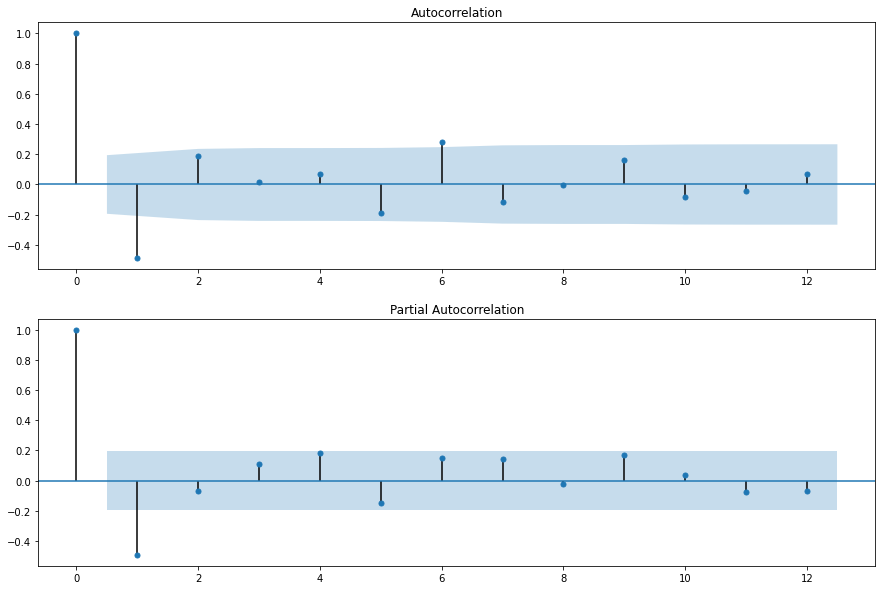

In [ ]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.show()

MODEL 3-SARIMAX MODEL

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train, order=(1,1,0), seasonal_order=(2,1,0,7))

In [ ]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

/root/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                     
Dep. Variable:                             Count   No. Observations:                  103
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 7)   Log Likelihood                -638.071
Date:                           Fri, 12 Jun 2020   AIC                           1284.141
Time:                                   06:52:05   BIC                           1294.357
Sample:                                        0   HQIC                          1288.269
                                           - 103                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6208      0.057    -10.952      0.000      -0.732      -0.510
ar.S.L7       -0.9018      0.105     -8.628

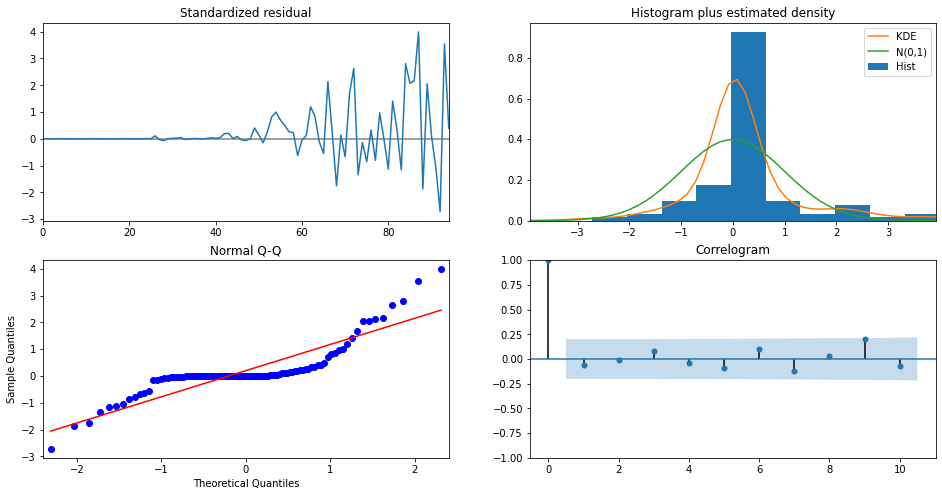

In [ ]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

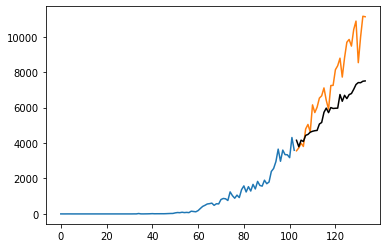

In [ ]:
forecast = model_fit.forecast(steps=31)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [ ]:
print(np.sqrt(mean_squared_error(y_true=test,y_pred=forecast)))
print(mean_absolute_percentage_error(test,forecast))

Getting predictions for future values:

In [ ]:
predictions=pd.DataFrame(forecast)
predictions.tail(9)

,0
134,7735.649568
135,7815.634178
136,8413.778592
137,8461.121158
138,8401.187021
139,8531.778679
140,8567.127751
141,8613.759290
142,8695.013886
